In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [2]:
#make df from fire csv
fire_df = pd.read_csv('2015-21.csv')
display(fire_df)

,fire_year,report_date,county,latitude,longitude,total_acres,general_cause
0,2015,1/26/15,Jackson,42.649444,-122.875833,0.01,Miscellaneous
1,2015,1/27/15,Josephine,42.472222,-122.734722,1.00,Lightning
2,2015,2/18/15,Jackson,42.459167,-122.868333,0.10,Recreationist
3,2015,2/22/15,Linn,44.720000,-121.553889,0.01,Recreationist
4,2015,2/22/15,Clackamas,45.204722,-121.680833,0.25,Debris Burning
...,...,...,...,...,...,...,...
6138,2021,5/21/21,Lane,44.200000,-123.900000,0.01,Debris Burning
6139,2021,5/22/21,Hood River,45.576111,-120.532500,0.10,Recreationist
6140,2021,5/23/21,Deschutes,43.665278,-120.487778,0.01,Equipment Use
6141,2021,5/24/21,Wasco,45.265000,-120.767778,14.56,Debris Burning


,cause type,frequency
0,Equipment Use,1430
1,Debris Burning,1316
2,Lightning,1304
3,Recreationist,791
4,Miscellaneous,662
5,Smoking,250
6,Arson,194
7,Under Invest,91
8,Juveniles,86
9,Railroad,19


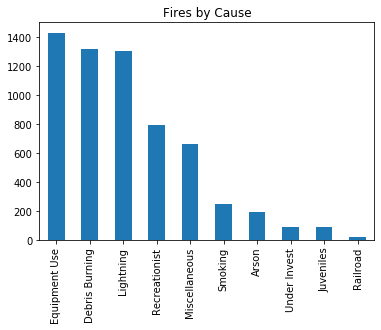

In [17]:
#How many fires started by each cause?

# converting to df and assigning new names to the columns
causes = fire_df['general_cause'].value_counts(ascending=False)
causes = causes.reset_index()
causes.columns = ['cause type', 'frequency'] # change column names
display(causes)
#create a chart
cause_chart = fire_df['general_cause'].value_counts().plot(kind='bar', title="Fires by Cause")
plt.show()

6143


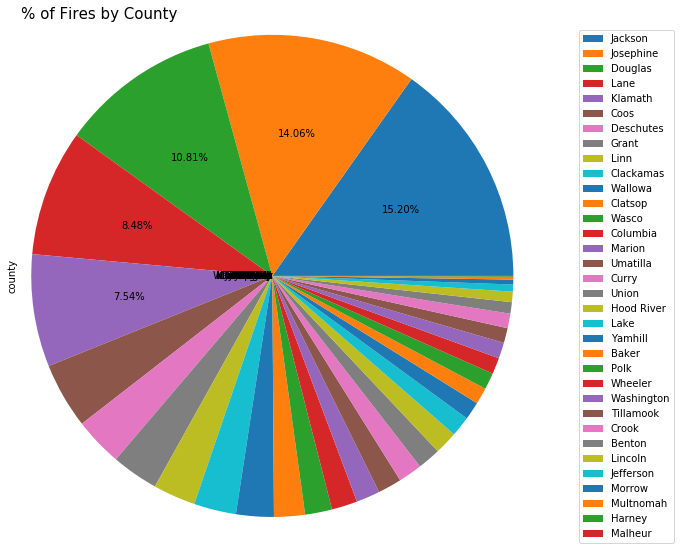

In [4]:
#how many fires per county?
county = fire_df['county'].value_counts(ascending=False)
county = county.reset_index()
county.columns = ['Location', 'frequency'] # change column names
#display(county)
print(sum(county['frequency']))
def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 7 else ''
fire_df['county'].value_counts().plot.pie(subplots=True, autopct=my_autopct, pctdistance = 0.6, labeldistance=0, legend=True, radius=1.2, rotatelabels=False)
plt.title("% of Fires by County", loc="left", fontsize=15)
plt.legend(bbox_to_anchor=(1.1, 0, 0.5, 1), loc="upper left")
fig = plt.gcf()
fig.set_size_inches(9,15)
plt.show()

Just 5 counties make up over 50% of Oregon's wildfires. Jackson, Josephine, Douglas, Lane and Klamath counties all have at least double the fires of any other county.

In [5]:
#Do different counties experience different cause? 
countyCause = fire_df.groupby('county')['general_cause'].value_counts().to_frame()
pd.set_option("display.max_rows", None, "display.max_columns", None)
countyCause



general_cause
county     general_cause                
Baker      Lightning                  41
           Debris Burning              8
           Recreationist               8
           Equipment Use               6
           Under Invest                3
           Miscellaneous               2
Benton     Equipment Use              18
           Recreationist               8
           Debris Burning              7
           Lightning                   5
           Miscellaneous               5
           Arson                       3
           Railroad                    1
Clackamas  Debris Burning             85
           Equipment Use              21
           Miscellaneous              21
           Recreationist              17
           Under Invest               13
           Smoking                     7
           Arson                       4
           Lightning                   4
           Juveniles                   2
Clatsop    Debris Burning             65
           Recreationist              34
           Equipment Use              13
           Miscellaneous               9
           Smoking                     3
           Juveniles                   2
           Lightning                   1
Columbia   Debris Burning             30
           Equipment Use              23
           Recreationist              15
           Miscellaneous              14
           Smoking                     7
           Arson                       6
           Lightning                   5
           Juveniles                   4
           Under Invest                2
Coos       Debris Burning             88
           Equipment Use              62
           Recreationist              47
           Miscellaneous              32
           Smoking                    30
           Juveniles                   8
           Lightning                   2
           Arson                       1
           Railroad                    1
Crook      Lightning                  36
           Recreationist               9
           Debris Burning              8
           Miscellaneous               4
           Equipment Use               2
           Smoking                     1
Curry      Debris Burning             28
           Equipment Use              22
           Recreationist              15
           Miscellaneous              13
           Lightning                  11
           Juveniles                   5
           Smoking                     4
Deschutes  Debris Burning             50
           Lightning                  45
           Miscellaneous              41
           Recreationist              28
           Equipment Use              24
           Juveniles                   6
           Arson                       5
           Smoking                     1
Douglas    Equipment Use             232
           Debris Burning            124
           Lightning                 107
           Recreationist              75
           Miscellaneous              69
           Arson                      28
           Smoking                    16
           Juveniles                   9
           Railroad                    2
           Under Invest                2
Grant      Lightning                 134
           Debris Burning             21
           Equipment Use              21
           Miscellaneous               7
           Recreationist               6
           Under Invest                3
           Arson                       1
Harney     Lightning                   3
Hood River Debris Burning             21
           Recreationist              21
           Equipment Use              20
           Miscellaneous               7
           Arson                       6
           Lightning                   6
           Railroad                    6
           Smoking                     5
           Juveniles                   2
           Under Invest                1
Jackson  

In [6]:
#Clean into most common cause by county
mostCommon = fire_df.groupby('county').general_cause.apply(lambda x : pd.Series.mode(x)[0]).to_frame()
display(mostCommon)
#plot?


,general_cause
county,
Baker,Lightning
Benton,Equipment Use
Clackamas,Debris Burning
Clatsop,Debris Burning
Columbia,Debris Burning
Coos,Debris Burning
Crook,Lightning
Curry,Debris Burning
Deschutes,Debris Burning


,total_acres
general_cause,
Arson,4732.93
Debris Burning,5426.69
Equipment Use,132913.06
Juveniles,79428.92
Lightning,937187.92
Miscellaneous,22643.23
Railroad,6.62
Recreationist,41432.64
Smoking,1472.88


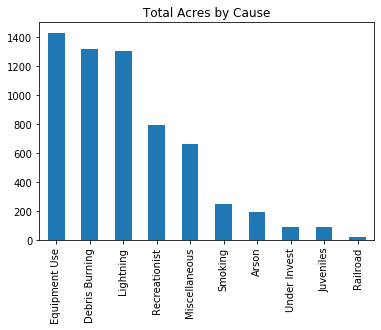

In [21]:
#How much acreage burned by cause?
acreagePlot = fire_df.groupby(by=['general_cause'])['total_acres'].sum().to_frame()
display(acreagePlot)
acreageplot = cause_chart = fire_df['general_cause'].value_counts().plot(kind='bar', title="Total Acres by Cause")


In [22]:
#How big is the average fire by type?
avg_acres= fire_df.groupby(by=['general_cause'])['total_acres'].mean().to_frame()
#worth plotting
avg_acres.head()
avgacreageplot = avg_acres['general_cause'].value_counts().plot(kind='bar', title="Total Acres by Cause")



,total_acres
general_cause,
Arson,24.396546
Debris Burning,4.123625
Equipment Use,92.946196
Juveniles,923.592093
Lightning,718.702393


In [9]:
#What county experienced the most acres burned?
mostacres = fire_df.groupby(by=['county'])['total_acres'].sum().to_frame())


,total_acres
county,
Baker,199153.18
Benton,78.26
Clackamas,139782.55
Clatsop,115.58
Columbia,175.65
Coos,518.28
Crook,1220.75
Curry,366459.31
Deschutes,24430.98


In [10]:
#What year burned the most acres?
acres_by_year = fire_df.groupby(by=['fire_year'])['total_acres'].sum().to_frame()
display(acres_by_year)
#worth plotting

,total_acres
fire_year,
2015,304011.88
2016,50499.36
2017,493379.76
2018,423456.86
2019,17238.87
2020,661729.44
2021,2252.65


In [11]:
#What year had the greatest number of fires?
fireCount_by_year = fire_df['fire_year'].value_counts().to_frame()
display(fireCount_by_year)
#plot

,fire_year
2018,1099
2015,1057
2017,1045
2019,996
2020,939
2016,819
2021,188


In [12]:
#Is the most common type of fire changing?
mostCommon_type = fire_df.groupby('fire_year').general_cause.apply(lambda x : pd.Series.mode(x)[0]).to_frame()
display(mostCommon_type)

,general_cause
fire_year,
2015,Lightning
2016,Equipment Use
2017,Lightning
2018,Debris Burning
2019,Lightning
2020,Equipment Use
2021,Debris Burning


In [13]:
#Is Eastern or Western OR more dangerous?
#center of Oregon is at latitude 44.57
western_fires = 0 
eastern_fires = 0
lng_list = fire_df['longitude'].tolist()
for x in lng_list:
    if x >= -120.5:
        eastern_fires = eastern_fires + 1
    if x < -120.5:
        western_fires = western_fires + 1
            
display(western_fires)
display(eastern_fires)
display(eastern_fires + western_fires)

4895

1248

6143

In [14]:
#Is North or South OR more dangerous?
northern_fires = 0
southern_fires = 0
lat_list = fire_df['latitude'].tolist()
for x in lat_list:
    if x >= 44:
        northern_fires = northern_fires + 1
    if x < 44:
        southern_fires = southern_fires + 1

display(northern_fires)
display(southern_fires)
display(southern_fires + northern_fires)

2417

3726

6143

In [15]:
#Plots of fire types by year